In [1]:
!gdown 1STmDw9gtVJlImN36-yGM7g_53xhmMOAM -O UserBehavior.csv

Downloading...
From (original): https://drive.google.com/uc?id=1STmDw9gtVJlImN36-yGM7g_53xhmMOAM
From (redirected): https://drive.google.com/uc?id=1STmDw9gtVJlImN36-yGM7g_53xhmMOAM&confirm=t&uuid=c4083b29-ae56-4999-bb8f-044bb388dc02
To: /content/UserBehavior.csv
100% 3.67G/3.67G [00:41<00:00, 88.0MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
column_names = ['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']
taobao_df=pd.read_csv('UserBehavior.csv',nrows=80000000,names=column_names)
taobao_df

,user_id,item_id,category_id,behavior_type,timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146
...,...,...,...,...,...
79999995,992781,2194211,2355072,pv,1512197874
79999996,992781,1160864,1859277,pv,1512198229
79999997,992781,4053215,1859277,pv,1512198242
79999998,992781,1389888,1859277,pv,1512198682


In [5]:
taobao_df=taobao_df[taobao_df['behavior_type']=='buy']
taobao_df

,user_id,item_id,category_id,behavior_type,timestamp
71,100,1603476,2951233,buy,1511579908
73,100,2971043,4869428,buy,1511617549
100,100,598929,2429887,buy,1511759458
119,100,1046201,3002561,buy,1511767298
125,100,1606258,4098232,buy,1511789940
...,...,...,...,...,...
79999679,992756,2164689,4244487,buy,1511770679
79999696,992756,3337988,3776866,buy,1512006282
79999705,992756,2290158,1451814,buy,1512114154
79999721,992768,1357749,1884322,buy,1511684003


In [6]:
taobao_df.nunique()

,0
user_id,536925
item_id,556431
category_id,6899
behavior_type,1
timestamp,557208


In [7]:
user_sequences=taobao_df.groupby('user_id').apply(
    lambda x: x.sort_values('timestamp')['item_id'].tolist()).to_dict()
print(f"Number of Users Interactions = {len(user_sequences)}")

<ipython-input-7-f11d252a210b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_sequences=taobao_df.groupby('user_id').apply(


Number of Users Interactions = 536925


In [8]:
seq_lens=[len(user_seq) for user_seq in user_sequences.values()]

In [9]:
print(f"Min Sequence Length = {np.min(seq_lens)}")
print(f"Max Sequence Length = {np.max(seq_lens)}")
print(f"Mean Sequence Length = {np.mean(seq_lens)}")

Min Sequence Length = 1
Max Sequence Length = 177
Mean Sequence Length = 3.0005233505610653


<ipython-input-17-290ed4fe21c4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(seq_lens, shade=True, color='blue')


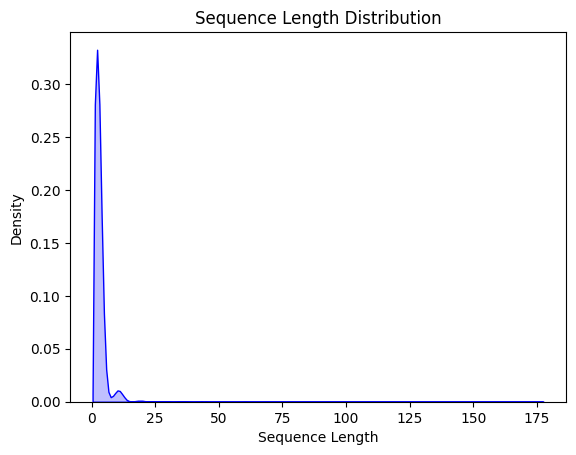

In [17]:
import seaborn as sns
sns.kdeplot(seq_lens, shade=True, color='blue')
plt.xlabel('Sequence Length')
plt.ylabel('Density')
plt.title('Sequence Length Distribution')
plt.show()

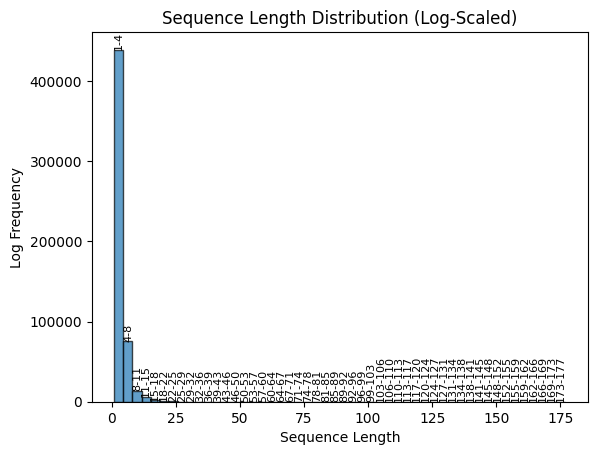

In [23]:
counts, bin_edges, _ = plt.hist(seq_lens, bins=50, edgecolor='black', alpha=0.7)

# Annotate each bar with the bin value
for count, left_edge, right_edge in zip(counts, bin_edges[:-1], bin_edges[1:]):
    bin_label = f"{int(left_edge)}-{int(right_edge)}"  # Format bin range
    plt.text(left_edge + (right_edge - left_edge) / 2, count, bin_label,
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.xlabel('Sequence Length')
plt.ylabel('Log Frequency')
plt.title('Sequence Length Distribution (Log-Scaled)')
plt.show()

In [28]:
users_ids=[]
required_len=10
for user_id,user_seq in user_sequences.items():
  if len(user_seq)>=required_len:
    users_ids.append(user_id)

print(f"Number of Users Interactions (>= {required_len} interaction) = {len(users_ids)}")

Number of Users Interactions (>= 10 interaction) = 16469


In [29]:
taobao_df=taobao_df[taobao_df['user_id'].isin(users_ids)]

In [30]:
taobao_df

,user_id,item_id,category_id,behavior_type,timestamp
2310,1000085,2426361,3164069,buy,1511679514
2333,1000085,1282204,1879672,buy,1511771238
2334,1000085,280390,2633883,buy,1511771239
2335,1000085,697256,3025028,buy,1511771239
2343,1000085,1242107,835895,buy,1511842036
...,...,...,...,...,...
79976931,99164,1908575,2228184,buy,1512050177
79976933,99164,4368693,3767409,buy,1512097939
79976952,99164,2617296,4801426,buy,1512210777
79976954,99164,5076206,685988,buy,1512262907


In [31]:
taobao_df.to_csv('taobao_df.csv',index=False)